This is an simple example of multi layer perceptron

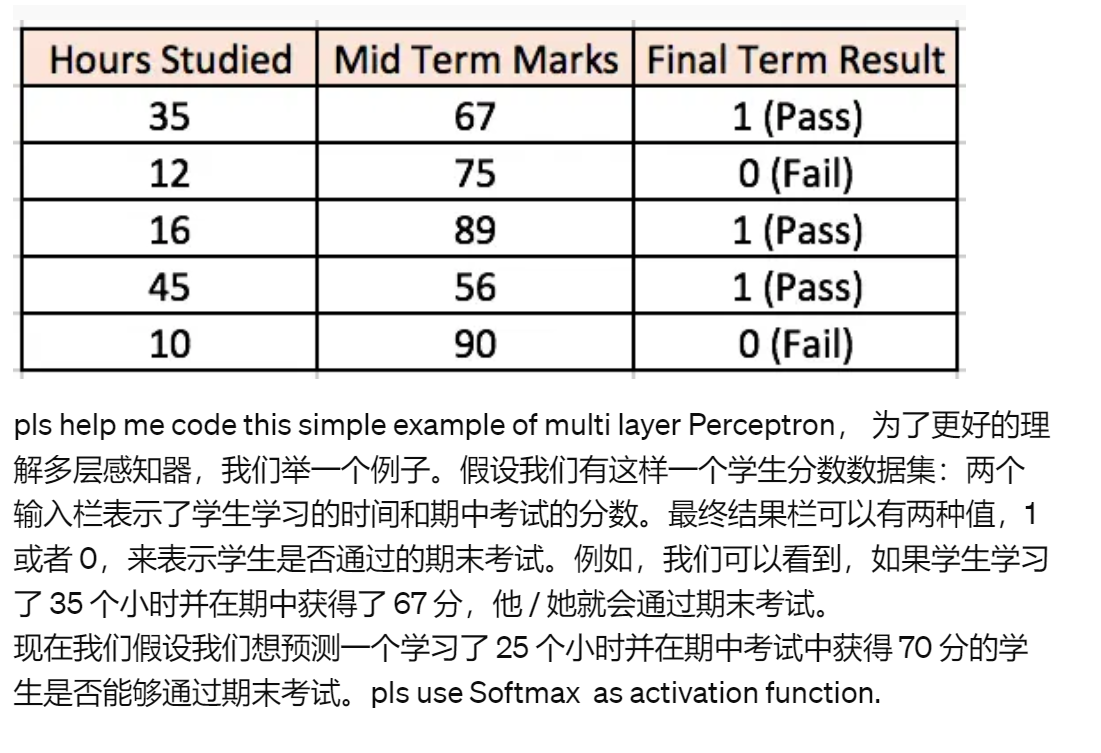

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Mock dataset

hours_studied = [35, 12, 16, 45, 10]  # Hours Studied
midterm_marks = [67, 75, 89, 56, 90]  # Mid Term Marks
final_results = [1, 0, 1, 1, 0]  # Final Term Result (1 for Pass, 0 for Fail)

In [2]:
# Convert lists to tensors
X = torch.tensor(list(zip(hours_studied, midterm_marks)), dtype=torch.float32)

y = torch.tensor(final_results, dtype=torch.long)

# Create dataset and data loarder
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


In [5]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    # this is a standard way to define a neural network model
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # 2 input features, 10 outputs
        self.fc2 = nn.Linear(10, 5)  # 10 inputs, 5 outputs
        self.fc3 = nn.Linear(5, 2)   # 5 inputs, 2 outputs (pass or fail)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)  # Use log_softmax for numerical stability

# Create the model
model = MLP()


In [6]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 50/500, Loss: 0.5633196234703064
Epoch 100/500, Loss: 0.8813556432723999
Epoch 150/500, Loss: 0.40497830510139465
Epoch 200/500, Loss: 0.005160820204764605
Epoch 250/500, Loss: 0.0033822020050138235
Epoch 300/500, Loss: 0.18345364928245544
Epoch 350/500, Loss: 0.14333750307559967
Epoch 400/500, Loss: 0.00047708096099086106
Epoch 450/500, Loss: 0.4614897072315216
Epoch 500/500, Loss: 0.00032634177478030324


In [7]:
# Predicting the result for a student who studied 25 hours and got 70 in midterm
test_input = torch.tensor([[25, 70]], dtype=torch.float32)
prediction = model(test_input)
predicted_class = torch.argmax(prediction, dim=1)
print("Predicted Class:", "Pass" if predicted_class.item() == 1 else "Fail")


Predicted Class: Pass
